# Delhivery - Feature Engineering

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2, chi2_contingency
from scipy.stats import t, norm, ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import pearsonr ,spearmanr
from scipy import stats
import statsmodels.api as sm
import statistics
from scipy.stats import poisson, binom
from scipy.stats import levene
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define Problem Statement and perform Exploratory Data Analysis

## Analyze the structure of the data

In [73]:
df = pd.read_csv("delhivery.csv")
data = pd.read_csv("delhivery.csv")

In [6]:
df.head(10)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   
5  training  2018-09-20 02:35:36.476840   
6  training  2018-09-20 02:35:36.476840   
7  training  2018-09-20 02:35:36.476840   
8  training  2018-09-20 02:35:36.476840   
9  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                    source_name  \
0  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
5  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
6  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
7  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
8  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
9  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
5       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
6       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
7       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
8       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
9       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   
5  2018-09-20 04:47:45.236797  ...         2018-09-20 06:15:58   
6  2018-09-20 04:47:45.236797  ...         2018-09-20 05:47:29   
7  2018-09-20 04:47:45.236797  ...         2018-09-20 05:25:58   
8  2018-09-20 04:47:45.236797  ...         2018-09-20 05:15:56   
9  2018-09-20 04:47:45.236797  ...         2018-09-20 04:49:20   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   
5                       10.403038         15.0       11.0       12.1171   
6                       18.045481         44.0       17.0       21.2890   
7                       28.061896   

## Definition of problem

The requirement is to understand and process the data coming out of data engineering pipelines:

- Clean, sanitize and manipulate data to get useful features out of raw fields

- Make sense out of the raw data and help the data science team to build forecasting models on it

- Identify if there is any meaningful relationships among these features and and if so how they are related

- Create new features out of this raw data which is more releveant for forecasting models

- Standardize the data where necessary

## Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [8]:
df.shape

(144867, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [10]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

**Observation:** As seen above there are some missing source_name and destination_name

In [12]:
df.describe() # statistical summary of numeric features

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min         9.000000       6.000000       9.008200       0.144000   
25%        51.000000      27.000000      29.914700       1.604264   
50%       132.000000      64.000000      78.525800       1.857143   
75%       513.000000     257.000000     343.193250       2.213483   
max      4532.000000    1686.000000    2326.199100      77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count        144867.000000      144867.000000           144867.00000   
mean             36.196111          18.507548               22.82902   
std              53.571158          14.775960               17.86066   
min            -244.000000           0.000000                0.00000   
25%              20.000000          11.000000               12.07010   
50%              29.000000          17.000000               23.51300   
75%              40.000000          22.000000               27.81325   
max            3051.000000        1611.000000             2191.40370   

       segment_factor  
count   144867.000000  
mean         2.218368  
std          4.847530  
min        -23.444444  
25%          1.347826  
50%          1.684211  
75%          2.250000  
max        574.250000

In [14]:
df.describe(include=['object']) # statistical summary of non-numeric values

data          trip_creation_time  \
count     144867                      144867   
unique         2                       14817   
top     training  2018-09-28 05:23:15.359220   
freq      104858                         101   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144574   
unique                    14817          1508                           1498   
top     trip-153811219535896559  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   

       destination_center               destination_name  \
count              144867                         144606   
unique               1481                           1468   
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                15192                          15192   

                     od_start_time                 od_end_time  \
count                       144867                      144867   
unique                       26369                       26369   
top     2018-09-21 18:37:09.322207  2018-09-24 09:59:15.691618   
freq                            81                          81   

           cutoff_timestamp  
count                144867  
unique                93180  
top     2018-09-24 05:19:20  
freq                     40

**Observation:** data and route_type are 2 categorical columns

In [18]:
df['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

In [19]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

**Insight:** 
- 'data' column has 2 unique values 'training' and 'test'
- 'route_type' has 2 unique values 'FTL' and 'Carting'

## Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)

### range of attributes, outliers of various attributes

<AxesSubplot:xlabel='start_scan_to_end_scan'>

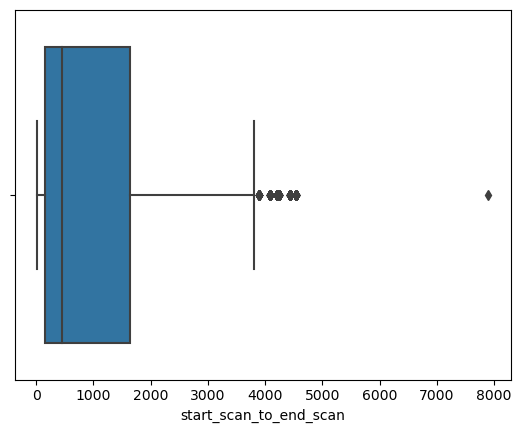

In [28]:
sns.boxplot(x=df["start_scan_to_end_scan"])

<AxesSubplot:xlabel='actual_distance_to_destination'>

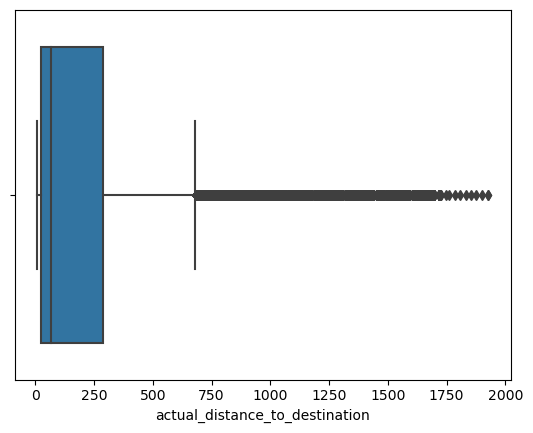

In [29]:
sns.boxplot(x=df["actual_distance_to_destination"])

In [138]:
df[df["actual_distance_to_destination"]>750].count()

data                              14969
trip_creation_time                14969
route_schedule_uuid               14969
route_type                        14969
trip_uuid                         14969
source_center                     14969
source_name                       14969
destination_center                14969
destination_name                  14969
od_start_time                     14969
od_end_time                       14969
start_scan_to_end_scan            14969
is_cutoff                         14969
cutoff_factor                     14969
cutoff_timestamp                  14969
actual_distance_to_destination    14969
actual_time                       14969
osrm_time                         14969
osrm_distance                     14969
factor                            14969
segment_actual_time               14969
segment_osrm_time                 14969
segment_osrm_distance             14969
segment_factor                    14969
destination_city                  14969


<AxesSubplot:xlabel='osrm_distance'>

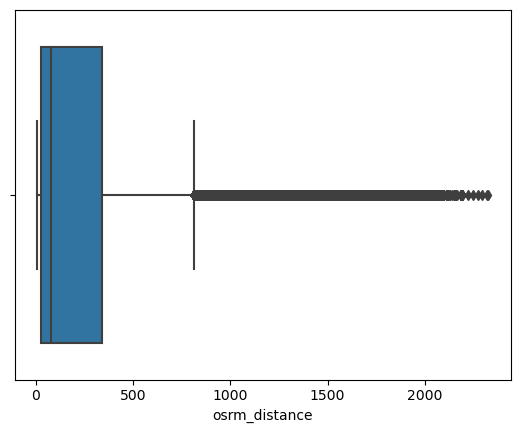

In [30]:
sns.boxplot(x=df["osrm_distance"])

<AxesSubplot:xlabel='osrm_time'>

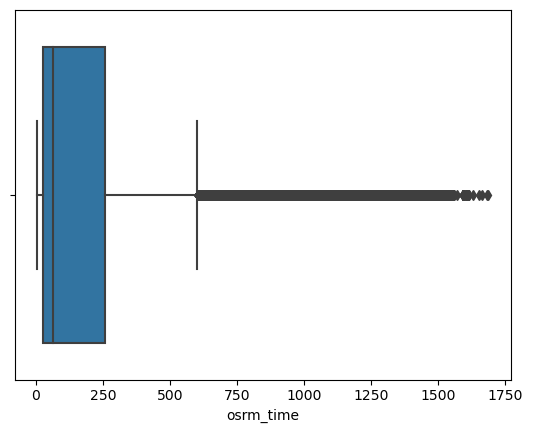

In [31]:
sns.boxplot(x=df["osrm_time"])

<AxesSubplot:xlabel='actual_time'>

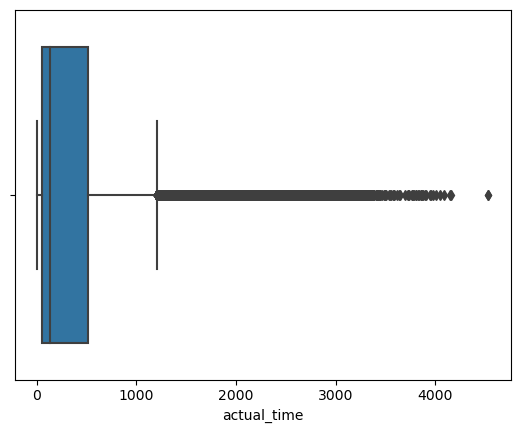

In [32]:
sns.boxplot(x=df["actual_time"])

**Insight:** start_scan_to_end_scan seems to be the only one having distinct outlier.

### distribution of the variables and relationship between them (univariate and bivariate plot)

In [22]:
df.describe()

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min         9.000000       6.000000       9.008200       0.144000   
25%        51.000000      27.000000      29.914700       1.604264   
50%       132.000000      64.000000      78.525800       1.857143   
75%       513.000000     257.000000     343.193250       2.213483   
max      4532.000000    1686.000000    2326.199100      77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count        144867.000000      144867.000000           144867.00000   
mean             36.196111          18.507548               22.82902   
std              53.571158          14.775960               17.86066   
min            -244.000000           0.000000                0.00000   
25%              20.000000          11.000000               12.07010   
50%              29.000000          17.000000               23.51300   
75%              40.000000          22.000000               27.81325   
max            3051.000000        1611.000000             2191.40370   

       segment_factor  
count   144867.000000  
mean         2.218368  
std          4.847530  
min        -23.444444  
25%          1.347826  
50%          1.684211  
75%          2.250000  
max        574.250000

In [23]:
df.describe(include=['object'])

data          trip_creation_time  \
count     144867                      144867   
unique         2                       14817   
top     training  2018-09-28 05:23:15.359220   
freq      104858                         101   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   

                      trip_uuid source_center                    source_name  \
count                    144867        144867                         144574   
unique                    14817          1508                           1498   
top     trip-153811219535896559  IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                        101         23347                          23347   

       destination_center               destination_name  \
count              144867                         144606   
unique               1481                           1468   
top          IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
freq                15192                          15192   

                     od_start_time                 od_end_time  \
count                       144867                      144867   
unique                       26369                       26369   
top     2018-09-21 18:37:09.322207  2018-09-24 09:59:15.691618   
freq                            81                          81   

           cutoff_timestamp  
count                144867  
unique                93180  
top     2018-09-24 05:19:20  
freq                     40

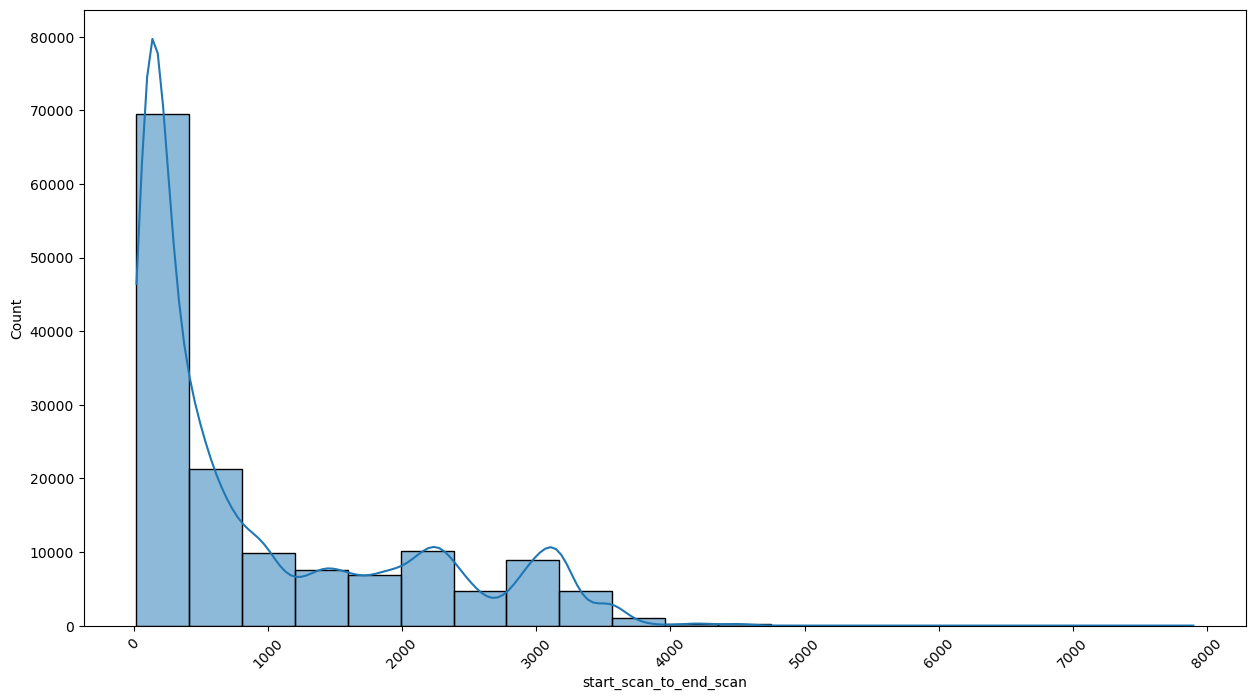

In [36]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="start_scan_to_end_scan", bins=20, data = df, kde=True)
plt.show()

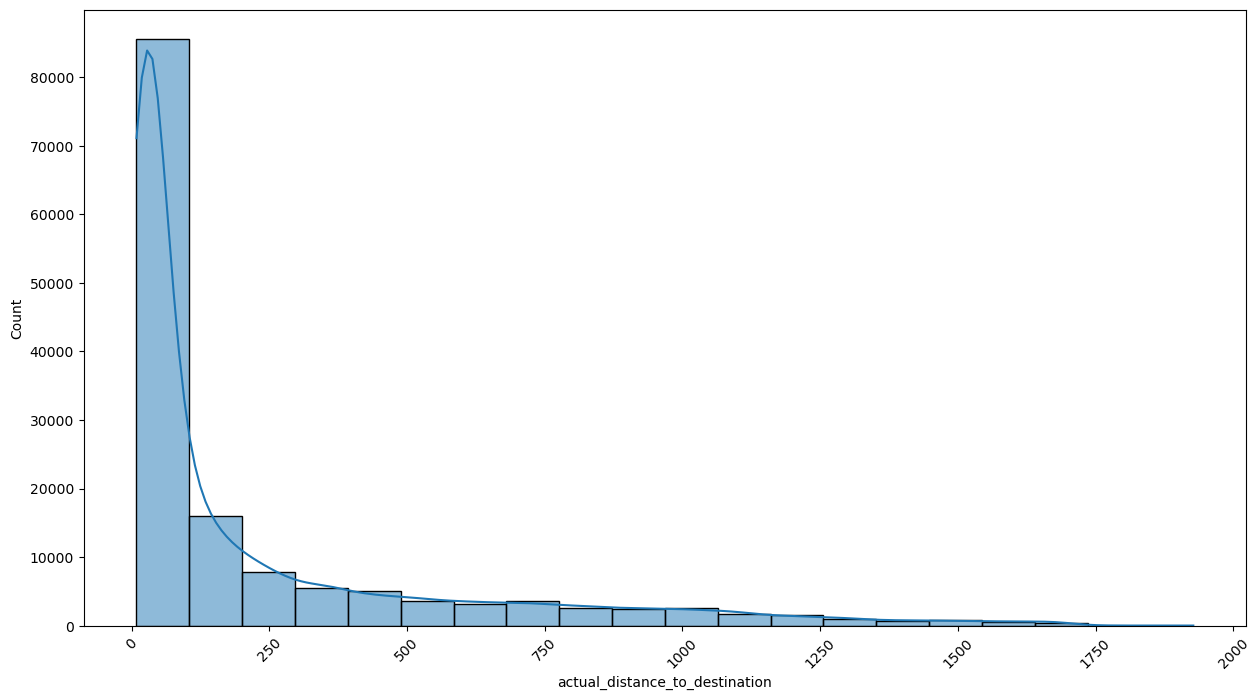

In [37]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="actual_distance_to_destination", bins=20, data = df, kde=True)
plt.show()

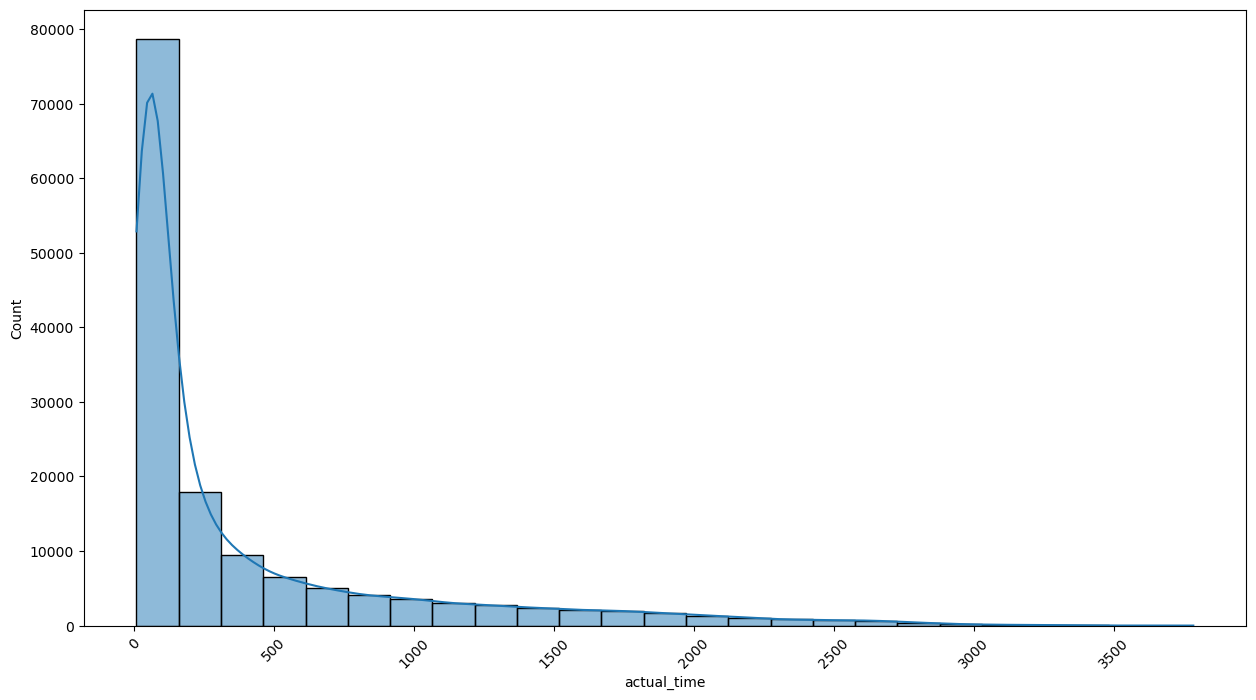

In [214]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(x="actual_time", bins=25, data = df, kde=True)
plt.show()

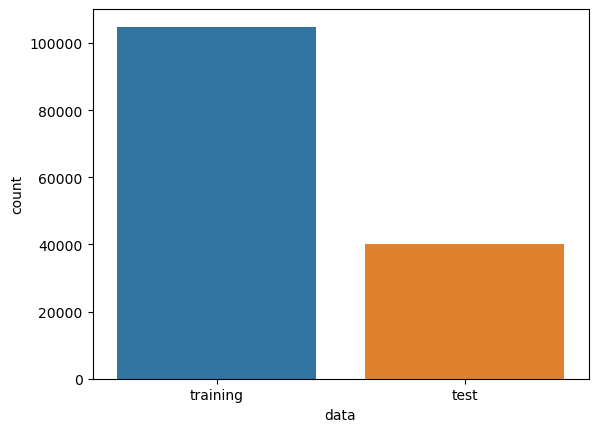

In [40]:
sns.countplot(x ='data', data = df)
plt.show()

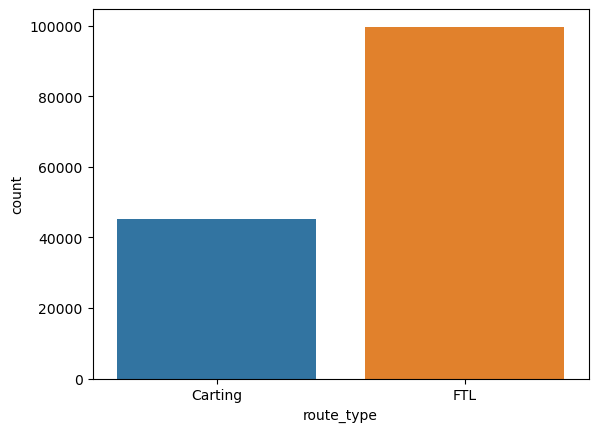

In [41]:
sns.countplot(x ='route_type', data = df)
plt.show()

**Insight** : The amount of FTL is almost twice that of carting visualy. Also most of the data in time or distance are not normally distributed.

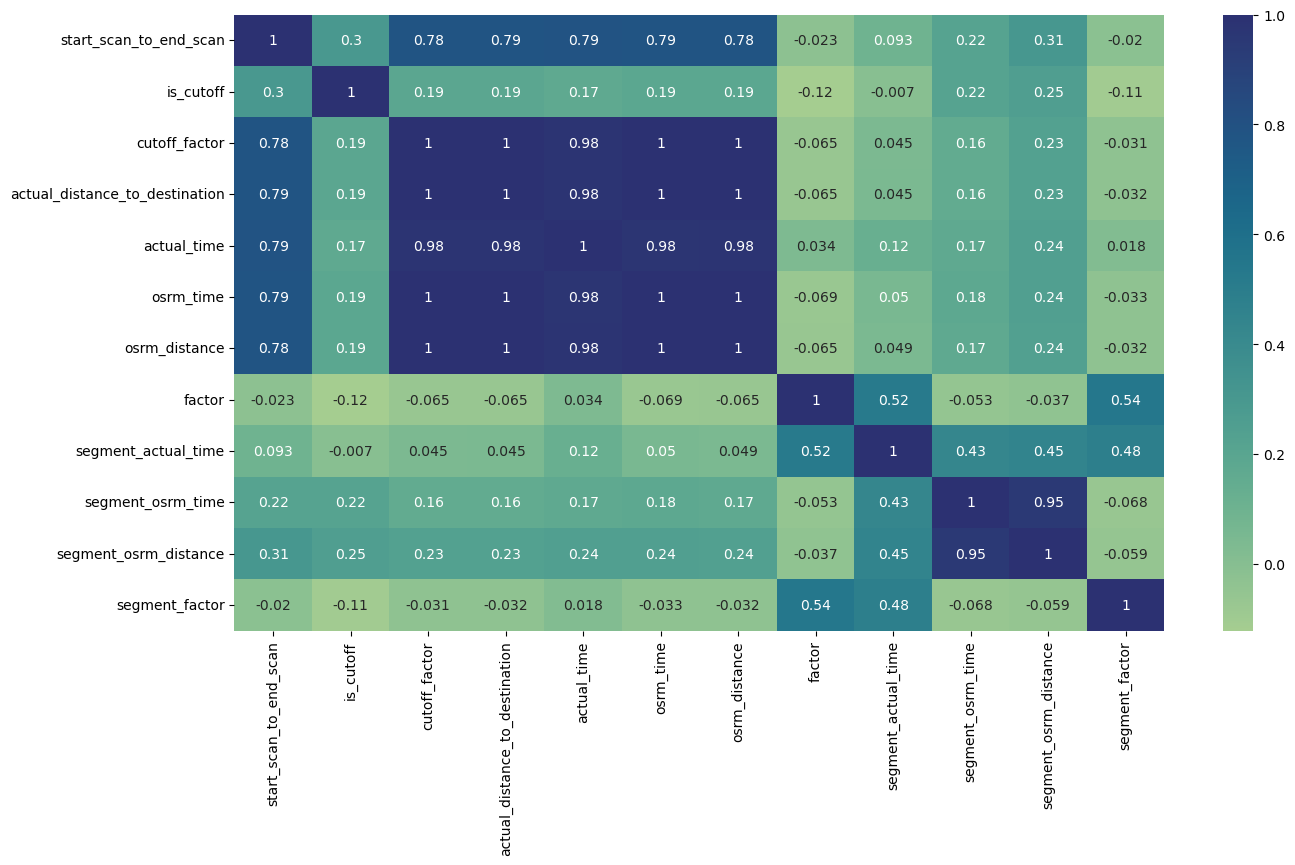

In [45]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.heatmap(df.corr(),annot=True, cmap="crest")
plt.show()

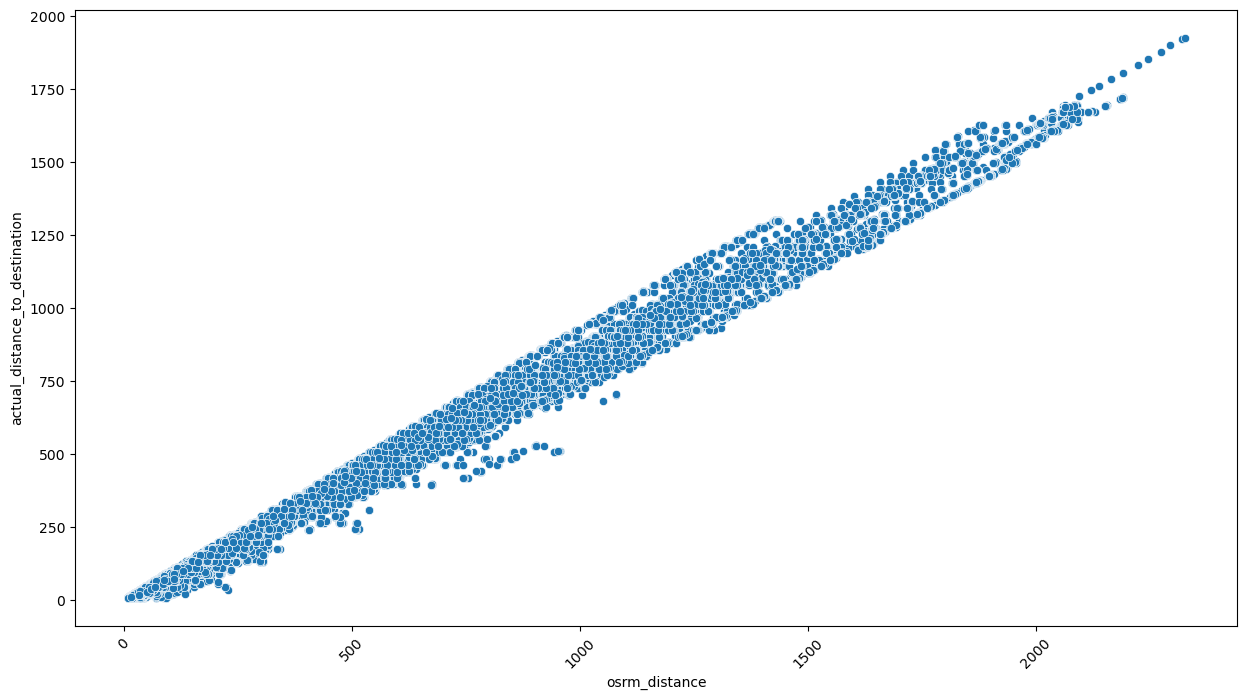

In [49]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.scatterplot(x='osrm_distance',y='actual_distance_to_destination',data=df)
plt.show()

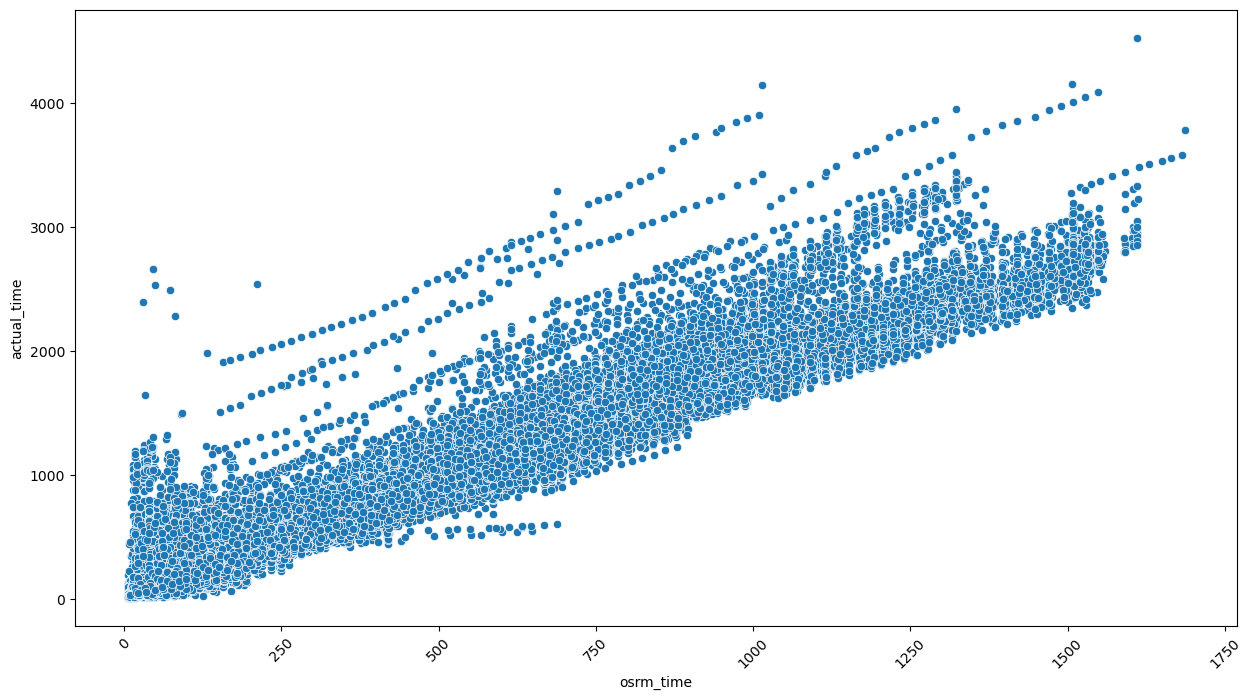

In [50]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.scatterplot(x='osrm_time',y='actual_time',data=df)
plt.show()

**Insight:** The accuracy of osrm_distance is higher than osrm time since its closer to a straight line

# Missing values Treatment & Outlier treatment (using the IQR method)

## Handle missing values in the data

In [51]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [69]:
df[df["source_name"].isna()]["trip_uuid"].unique()

array(['trip-153786558437756691', 'trip-153842737815495661',
       'trip-153834519721733970', 'trip-153846056503320607',
       'trip-153852612674280168', 'trip-153785822252799564',
       'trip-153835867702133730', 'trip-153843937115921268',
       'trip-153851526862672465', 'trip-153783153973255752',
       'trip-153786712501643905', 'trip-153818244828109704',
       'trip-153777969957700771', 'trip-153802263936969812',
       'trip-153812396555262982', 'trip-153799300352000726',
       'trip-153800882473542201', 'trip-153781894334349262',
       'trip-153833330949418536', 'trip-153836697913613926',
       'trip-153769166516379642', 'trip-153829753238591840',
       'trip-153860002475779846', 'trip-153854526936264994',
       'trip-153824891534925374', 'trip-153785493712368255',
       'trip-153851268207010003', 'trip-153826788460137094',
       'trip-153860203010589724', 'trip-153809438886343536',
       'trip-153790525985329256', 'trip-153792104124206797',
       'trip-15380005166

In [62]:
len(df["trip_uuid"].unique())

14817

In [63]:
df[df["trip_uuid"]=='trip-153786558437756691']

data          trip_creation_time  \
91   training  2018-09-25 08:53:04.377810   
92   training  2018-09-25 08:53:04.377810   
93   training  2018-09-25 08:53:04.377810   
94   training  2018-09-25 08:53:04.377810   
95   training  2018-09-25 08:53:04.377810   
96   training  2018-09-25 08:53:04.377810   
97   training  2018-09-25 08:53:04.377810   
98   training  2018-09-25 08:53:04.377810   
99   training  2018-09-25 08:53:04.377810   
100  training  2018-09-25 08:53:04.377810   
101  training  2018-09-25 08:53:04.377810   
102  training  2018-09-25 08:53:04.377810   
103  training  2018-09-25 08:53:04.377810   
104  training  2018-09-25 08:53:04.377810   
105  training  2018-09-25 08:53:04.377810   
106  training  2018-09-25 08:53:04.377810   
107  training  2018-09-25 08:53:04.377810   
108  training  2018-09-25 08:53:04.377810   
109  training  2018-09-25 08:53:04.377810   
110  training  2018-09-25 08:53:04.377810   
111  training  2018-09-25 08:53:04.377810   
112  training  2018-09-25 08:53:04.377810   
113  training  2018-09-25 08:53:04.377810   
114  training  2018-09-25 08:53:04.377810   
115  training  2018-09-25 08:53:04.377810   
116  training  2018-09-25 08:53:04.377810   
117  training  2018-09-25 08:53:04.377810   
118  training  2018-09-25 08:53:04.377810   
119  training  2018-09-25 08:53:04.377810   
120  training  2018-09-25 08:53:04.377810   
121  training  2018-09-25 08:53:04.377810   

                                   route_schedule_uuid route_type  \
91   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
92   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
93   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
94   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
95   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
96   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
97   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
98   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
99   thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
100  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
101  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
102  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
103  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
104  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
105  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
106  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
107  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
108  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
109  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
110  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
111  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
112  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
113  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
114  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
115  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
116  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
117  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
118  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
119  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
120  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
121  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   

                   trip_uuid source_center                       source_name  \
91   trip-153786558437756691  IND302014AAA            Jaipur_Hub (Rajasthan)   
92   trip-153786558437756691  IND302014AAA            Jaipur_Hub (Rajasthan)   
93   trip-153786558437756691  IND302014AAA            Jaipur_Hub (Rajasthan)   
94   trip-153786558437756691  IND302014

In [67]:
df[(df["source_center"]=="IND342902A1B") | (df["destination_center"]=="IND342902A1B")]

data          trip_creation_time  \
110     training  2018-09-25 08:53:04.377810   
111     training  2018-09-25 08:53:04.377810   
112     training  2018-09-25 08:53:04.377810   
113     training  2018-09-25 08:53:04.377810   
114     training  2018-09-25 08:53:04.377810   
...          ...                         ...   
102433      test  2018-10-02 09:03:43.743009   
102434      test  2018-10-02 09:03:43.743009   
102435      test  2018-10-02 09:03:43.743009   
102436      test  2018-10-02 09:03:43.743009   
102437      test  2018-10-02 09:03:43.743009   

                                      route_schedule_uuid route_type  \
110     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
111     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
112     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
113     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
114     thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
...                                                   ...        ...   
102433  thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...        FTL   
102434  thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...        FTL   
102435  thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...        FTL   
102436  thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...        FTL   
102437  thanos::sroute:88f3c4f2-ba7c-4817-8dff-e181ba3...        FTL   

                      trip_uuid source_center  \
110     trip-153786558437756691  IND342601AAA   
111     trip-153786558437756691  IND342601AAA   
112     trip-153786558437756691  IND342902A1B   
113     trip-153786558437756691  IND342902A1B   
114     trip-153786558437756691  IND342902A1B   
...                         ...           ...   
102433  trip-153847102374259925  IND342902A1B   
102434  trip-153847102374259925  IND342902A1B   
102435  trip-153847102374259925  IND342902A1B   
102436  trip-153847102374259925  IND342902A1B   
102437  trip-153847102374259925  IND342902A1B   

                             source_name destination_center  \
110     Piparcity_BsstdDPP_D (Rajasthan)       IND342902A1B   
111     Piparcity_BsstdDPP_D (Rajasthan)       IND342902A1B   
112                                  NaN       IND302014AAA   
113                                  NaN       IND302014AAA   
114                                  NaN       IND302014AAA   
...                                  ...                ...   
102433                               NaN       IND302014AAA   
102434                               NaN       IND302014AAA   
102435                               NaN       IND302014AAA   
102436                               NaN       IND302014AAA   
102437                               NaN       IND302014AAA   

              destination_name               od_start_time  ...  \
110                        NaN  2018-09-26 05:04:49.254901  ...   
111                        NaN  2018-09-26 05:04:49.254901  ...   
112     Jaipur_Hub (Rajasthan)  2018-09-26 06:58:08.054001  ...   
113     Jaipur_Hub (Rajasthan)  2018-09-26 06:58:08.054001  ...   
114     Jaipur_Hub (Rajasthan)  2018-09-26 06:58:08.054001  ...   
...                        ...                         ...  ...   
102433  Jaipur_Hub (Rajasthan)  2018-10-03 06:26:15.394809  ...   
102434  Jaipur_Hub (Rajasthan)  2018-10-03 06:26:15.394809  ...   
102435  Jaipur_Hub (Rajasthan)  2018-10-03 06:26:15.394809  ...   
102436  Jaipur_Hub (Rajasthan)  2018-10-03 06:26:15.394809  ...   
102437  Jaipur_Hub (Rajasthan)  2018-10-03 06:26:15.394809  ...   

                  cutoff_timestamp  actual_distance_to_destination  \
110            2018-09-26 05:57:25                       24.538214   
111     2018-09-26 05:04:49.254901                       34.657709   
112            2018-09-26 14:09:19                       22.783440   
113            2018-09-26 13:19:23                       46.071250   
114            2018-09-26 12:49:33                       67.714993   

In [72]:
df[df["source_name"].isna()]["source_center"].unique()

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [70]:
df[df["destination_name"].isna()]["destination_center"].unique()

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

Seems like "IND342902A1B" and some other source and destination center are ones whose names are missing

**So instead of dropping missing values we can replace the missing names with the corresponding centre code**

In [79]:
df.groupby(["source_center","source_name"])

In [81]:
df.loc[df['source_name'].isna(), 'source_name'] = df["source_center"]

In [83]:
df.loc[df['destination_name'].isna(), 'destination_name'] = df["destination_center"]

In [84]:
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

In [85]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

**Insight:** All missing values has been removed successfully

## Outlier detection

<AxesSubplot:xlabel='start_scan_to_end_scan'>

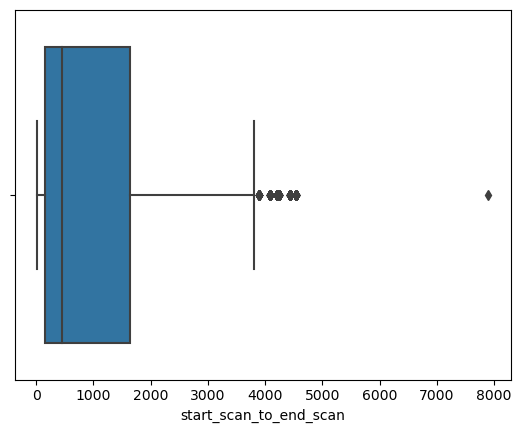

In [86]:
sns.boxplot(x=df["start_scan_to_end_scan"])

In [88]:

Q1 = np.percentile(df["start_scan_to_end_scan"], 25, interpolation = 'midpoint')
Q2 = np.percentile(df["start_scan_to_end_scan"], 50, interpolation = 'midpoint')
Q3 = np.percentile(df["start_scan_to_end_scan"], 75, interpolation = 'midpoint')
 
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
 
IQR = Q3 - Q1
print('Interquartile range is', IQR)
upperWhisker = Q3 + 1.5*IQR
print('upper limit',upperWhisker)

Q1 25 percentile of the given data is,  161.0
Q1 50 percentile of the given data is,  449.0
Q1 75 percentile of the given data is,  1634.0
Interquartile range is 1473.0
upper limit 3843.5


In [91]:
df[df["start_scan_to_end_scan"]>upperWhisker]

data          trip_creation_time  \
32950   training  2018-09-13 01:28:45.326644   
32951   training  2018-09-13 01:28:45.326644   
32952   training  2018-09-13 01:28:45.326644   
32953   training  2018-09-13 01:28:45.326644   
32954   training  2018-09-13 01:28:45.326644   
...          ...                         ...   
79524   training  2018-09-19 13:44:58.665210   
79525   training  2018-09-19 13:44:58.665210   
79526   training  2018-09-19 13:44:58.665210   
79527   training  2018-09-19 13:44:58.665210   
123196      test  2018-10-01 23:35:54.432745   

                                      route_schedule_uuid route_type  \
32950   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32951   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32952   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32953   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
32954   thanos::sroute:6b87651c-fdf4-432f-bf80-0e394f3...        FTL   
...                                                   ...        ...   
79524   thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...        FTL   
79525   thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...        FTL   
79526   thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...        FTL   
79527   thanos::sroute:bc7dbb1d-9379-4674-b8d3-f9c3b96...        FTL   
123196  thanos::sroute:4316e05f-b4cc-4ea7-b801-62a93ae...    Carting   

                      trip_uuid source_center  \
32950   trip-153680212532637033  IND712311AAA   
32951   trip-153680212532637033  IND712311AAA   
32952   trip-153680212532637033  IND712311AAA   
32953   trip-153680212532637033  IND712311AAA   
32954   trip-153680212532637033  IND712311AAA   
...                         ...           ...   
79524   trip-153736469866480991  IND000000ACB   
79525   trip-153736469866480991  IND000000ACB   
79526   trip-153736469866480991  IND000000ACB   
79527   trip-153736469866480991  IND000000ACB   
123196  trip-153843695443252828  IND764071AAB   

                                source_name destination_center  \
32950      Kolkata_Dankuni_HB (West Bengal)       IND781018AAB   
32951      Kolkata_Dankuni_HB (West Bengal)       IND781018AAB   
32952      Kolkata_Dankuni_HB (West Bengal)       IND781018AAB   
32953      Kolkata_Dankuni_HB (West Bengal)       IND781018AAB   
32954      Kolkata_Dankuni_HB (West Bengal)       IND781018AAB   
...                                     ...                ...   
79524         Gurgaon_Bilaspur_HB (Haryana)       IND712311AAA   
79525         Gurgaon_Bilaspur_HB (Haryana)       IND712311AAA   
79526         Gurgaon_Bilaspur_HB (Haryana)       IND712311AAA   
79527         Gurgaon_Bilaspur_HB (Haryana)       IND712311AAA   
123196  Pappadahandi_Central_DPP_2 (Orissa)       IND530012AAA   

                                  destination_name  \
32950                         Guwahati_Hub (Assam)   
32951                         Guwahati_Hub (Assam)   
32952                         Guwahati_Hub (Assam)   
32953                         Guwahati_Hub (Assam)   
32954                         Guwahati_Hub (Assam)   
...                                            ...   
79524             Kolkata_Dankuni_HB (West Bengal)   
79525             Kolkata_Dankuni_HB (West Bengal)   
79526             Kolkata_Dankuni_HB (West Bengal)   
79527             Kolkata_Dankuni_HB (West Bengal)   
123196  Visakhapatnam_Gajuwaka_IP (Andhra Pradesh)   

                     od_start_time  ...     cutoff_timestamp  \
32950   2018-09-13 01:28:45.326644  ...  2018-09-15 09:59:21   
32951   2018-09-13 01:28:45.326644  ...  2018-09-15 09:11:23   
32952   2018-09-13 01:28:45.326644  ...  2018-09-15 08:11:31   
32953   2018-09-13 01:28:45.326644  ...  2018-09-15 07:27:32   
32954   2018-09-13 01:28:45.326644  ...  2018-09-15 05:47:23   
...                            ...  ...                  ...   
79524   2018-09-19 13:44:58.665210  ...  2018-09-19 18:47:20   
79525   2018-09-19 13:44:58

In [92]:
df.drop(df[df["start_scan_to_end_scan"]>upperWhisker].index , inplace=True)

<AxesSubplot:xlabel='start_scan_to_end_scan'>

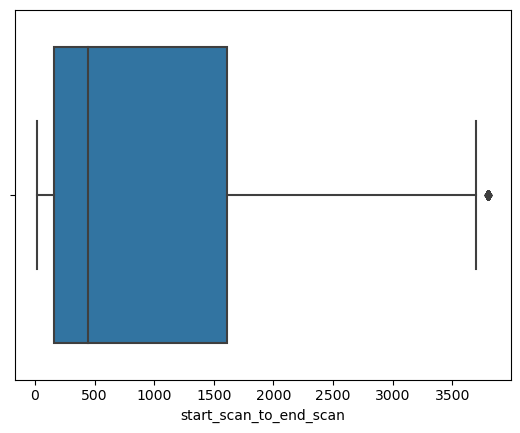

In [95]:
sns.boxplot(x=df["start_scan_to_end_scan"])

**Insight:** start_scan_to_end_scan  outlier has been removed. If I remove outliers from other columns there will be thousands of data points lost. So we would loose too much data to process further.

# Feature Creation

## Destination Name: Split and extract features out of destination. City-place-code (State)

In [99]:
temp=df["destination_name"].str.split("_",  expand = True)
temp

0         1             2     3
0       Khambhat  MotvdDPP   D (Gujarat)  None
1       Khambhat  MotvdDPP   D (Gujarat)  None
2       Khambhat  MotvdDPP   D (Gujarat)  None
3       Khambhat  MotvdDPP   D (Gujarat)  None
4       Khambhat  MotvdDPP   D (Gujarat)  None
...          ...       ...           ...   ...
144862   Gurgaon  Bilaspur  HB (Haryana)  None
144863   Gurgaon  Bilaspur  HB (Haryana)  None
144864   Gurgaon  Bilaspur  HB (Haryana)  None
144865   Gurgaon  Bilaspur  HB (Haryana)  None
144866   Gurgaon  Bilaspur  HB (Haryana)  None

[144494 rows x 4 columns]

In [100]:
df['destination_city']=temp[0]

In [101]:
df['destination_place']=temp[1]

In [102]:
df['destination_code_state']=temp[2]

In [103]:
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ... osrm_time  osrm_distance    factor  \
0  2018-09-20 03:21:32.418600  ...      11.0        11.9653  1.272727   
1  2018-09-20 03:21:32.418600  ...      20.0        21.7243  1.200000   
2  2018-09-20 03:21:32.418600  ...      28.0        32.5395  1.428571   
3  2018-09-20 03:21:32.418600  ...      40.0        45.5620  1.550000   
4  2018-09-20 03:21:32.418600  ...      44.0        54.2181  1.545455   

   segment_actual_time segment_osrm_time  segment_osrm_distance  \
0                 14.0              11.0                11.9653   
1                 10.0               9.0                 9.7590   
2                 16.0               7.0                10.8152   
3                 21.0              12.0                13.0224   
4                  6.0               5.0                 3.9153   

   segment_factor  destination_city  destination_place  destination_code_state  
0        1.272727          Khambhat           MotvdDPP             D (Gujarat)  
1        1.111111          Khambhat           MotvdDPP             D (Gujarat)  
2        2.285714          Khambhat           MotvdDPP             D (Gujarat)  
3        1.750000          Khambhat           MotvdDPP             D (Gujarat)  
4        1.200000          Khambhat           MotvdDPP             D (Gujarat)  

[5 rows x 27 columns]

**Insight:** Destination city , place and state are separated in to separate columns

## Source Name: Split and extract features out of destination. City-place-code (State)

In [104]:
temp=df["source_name"].str.split("_",  expand = True)
temp

0        1             2     3
0         Anand  VUNagar  DC (Gujarat)  None
1         Anand  VUNagar  DC (Gujarat)  None
2         Anand  VUNagar  DC (Gujarat)  None
3         Anand  VUNagar  DC (Gujarat)  None
4         Anand  VUNagar  DC (Gujarat)  None
...         ...      ...           ...   ...
144862  Sonipat   Kundli   H (Haryana)  None
144863  Sonipat   Kundli   H (Haryana)  None
144864  Sonipat   Kundli   H (Haryana)  None
144865  Sonipat   Kundli   H (Haryana)  None
144866  Sonipat   Kundli   H (Haryana)  None

[144494 rows x 4 columns]

In [105]:
df['source_city']=temp[0]
df['source_place']=temp[1]
df['source_code_state']=temp[2]

In [106]:
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ... segment_actual_time  segment_osrm_time  \
0  2018-09-20 03:21:32.418600  ...                14.0               11.0   
1  2018-09-20 03:21:32.418600  ...                10.0                9.0   
2  2018-09-20 03:21:32.418600  ...                16.0                7.0   
3  2018-09-20 03:21:32.418600  ...                21.0               12.0   
4  2018-09-20 03:21:32.418600  ...                 6.0                5.0   

   segment_osrm_distance  segment_factor destination_city  destination_place  \
0                11.9653        1.272727         Khambhat           MotvdDPP   
1                 9.7590        1.111111         Khambhat           MotvdDPP   
2                10.8152        2.285714         Khambhat           MotvdDPP   
3                13.0224        1.750000         Khambhat           MotvdDPP   
4                 3.9153        1.200000         Khambhat           MotvdDPP   

   destination_code_state  source_city  source_place  source_code_state  
0             D (Gujarat)        Anand       VUNagar       DC (Gujarat)  
1             D (Gujarat)        Anand       VUNagar       DC (Gujarat)  
2             D (Gujarat)        Anand       VUNagar       DC (Gujarat)  
3             D (Gujarat)        Anand       VUNagar       DC (Gujarat)  
4             D (Gujarat)        Anand       VUNagar       DC (Gujarat)  

[5 rows x 30 columns]

**Insight:** Source city , place and state are separated in to separate columns

## Trip_creation_time: Extract features like month, year and day etc

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144494 entries, 0 to 144866
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144494 non-null  object 
 1   trip_creation_time              144494 non-null  object 
 2   route_schedule_uuid             144494 non-null  object 
 3   route_type                      144494 non-null  object 
 4   trip_uuid                       144494 non-null  object 
 5   source_center                   144494 non-null  object 
 6   source_name                     144494 non-null  object 
 7   destination_center              144494 non-null  object 
 8   destination_name                144494 non-null  object 
 9   od_start_time                   144494 non-null  object 
 10  od_end_time                     144494 non-null  object 
 11  start_scan_to_end_scan          144494 non-null  float64
 12  is_cutoff       

In [110]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144494 entries, 0 to 144866
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144494 non-null  object        
 1   trip_creation_time              144494 non-null  datetime64[ns]
 2   route_schedule_uuid             144494 non-null  object        
 3   route_type                      144494 non-null  object        
 4   trip_uuid                       144494 non-null  object        
 5   source_center                   144494 non-null  object        
 6   source_name                     144494 non-null  object        
 7   destination_center              144494 non-null  object        
 8   destination_name                144494 non-null  object        
 9   od_start_time                   144494 non-null  object        
 10  od_end_time                     144494 non-null  object 

In [112]:
df['trip_month'] = df['trip_creation_time'].dt.month
df['trip_year']= df['trip_creation_time'].dt.year

In [114]:
df['trip_day']=df['trip_creation_time'].dt.day

In [115]:
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ... segment_factor  destination_city  \
0  2018-09-20 03:21:32.418600  ...       1.272727          Khambhat   
1  2018-09-20 03:21:32.418600  ...       1.111111          Khambhat   
2  2018-09-20 03:21:32.418600  ...       2.285714          Khambhat   
3  2018-09-20 03:21:32.418600  ...       1.750000          Khambhat   
4  2018-09-20 03:21:32.418600  ...       1.200000          Khambhat   

   destination_place  destination_code_state source_city  source_place  \
0           MotvdDPP             D (Gujarat)       Anand       VUNagar   
1           MotvdDPP             D (Gujarat)       Anand       VUNagar   
2           MotvdDPP             D (Gujarat)       Anand       VUNagar   
3           MotvdDPP             D (Gujarat)       Anand       VUNagar   
4           MotvdDPP             D (Gujarat)       Anand       VUNagar   

   source_code_state  trip_month  trip_year  trip_day  
0       DC (Gujarat)           9       2018        20  
1       DC (Gujarat)           9       2018        20  
2       DC (Gujarat)           9       2018        20  
3       DC (Gujarat)           9       2018        20  
4       DC (Gujarat)           9       2018        20  

[5 rows x 33 columns]

**Insight:** extracted month, year and day separately from trip creation time

## Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [116]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144494 entries, 0 to 144866
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144494 non-null  object        
 1   trip_creation_time              144494 non-null  datetime64[ns]
 2   route_schedule_uuid             144494 non-null  object        
 3   route_type                      144494 non-null  object        
 4   trip_uuid                       144494 non-null  object        
 5   source_center                   144494 non-null  object        
 6   source_name                     144494 non-null  object        
 7   destination_center              144494 non-null  object        
 8   destination_name                144494 non-null  object        
 9   od_start_time                   144494 non-null  datetime64[ns]
 10  od_end_time                     144494 non-null  datetim

In [119]:
df['total_time'] = (df['od_end_time']-df['od_start_time'])

In [132]:
df['total_time'] = np.round(df['total_time'].dt.seconds / 60 , 2)

In [133]:
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ... destination_city  destination_place  \
0 2018-09-20 03:21:32.418600  ...         Khambhat           MotvdDPP   
1 2018-09-20 03:21:32.418600  ...         Khambhat           MotvdDPP   
2 2018-09-20 03:21:32.418600  ...         Khambhat           MotvdDPP   
3 2018-09-20 03:21:32.418600  ...         Khambhat           MotvdDPP   
4 2018-09-20 03:21:32.418600  ...         Khambhat           MotvdDPP   

   destination_code_state  source_city source_place  source_code_state  \
0             D (Gujarat)        Anand      VUNagar       DC (Gujarat)   
1             D (Gujarat)        Anand      VUNagar       DC (Gujarat)   
2             D (Gujarat)        Anand      VUNagar       DC (Gujarat)   
3             D (Gujarat)        Anand      VUNagar       DC (Gujarat)   
4             D (Gujarat)        Anand      VUNagar       DC (Gujarat)   

   trip_month  trip_year  trip_day  total_time  
0           9       2018        20        86.2  
1           9       2018        20        86.2  
2           9       2018        20        86.2  
3           9       2018        20        86.2  
4           9       2018        20        86.2  

[5 rows x 34 columns]

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144494 entries, 0 to 144866
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144494 non-null  object        
 1   trip_creation_time              144494 non-null  datetime64[ns]
 2   route_schedule_uuid             144494 non-null  object        
 3   route_type                      144494 non-null  object        
 4   trip_uuid                       144494 non-null  object        
 5   source_center                   144494 non-null  object        
 6   source_name                     144494 non-null  object        
 7   destination_center              144494 non-null  object        
 8   destination_name                144494 non-null  object        
 9   od_start_time                   144494 non-null  datetime64[ns]
 10  od_end_time                     144494 non-null  datetim

**Insight:** catculated total time taken between od start and end time in minutes

# Handling categorical values (Do one-hot encoding of categorical variables)

In [136]:
df_hot_encoded = pd.get_dummies(data = df, columns = ["route_type"], prefix = "is")
df_hot_encoded

data         trip_creation_time  \
0       training 2018-09-20 02:35:36.476840   
1       training 2018-09-20 02:35:36.476840   
2       training 2018-09-20 02:35:36.476840   
3       training 2018-09-20 02:35:36.476840   
4       training 2018-09-20 02:35:36.476840   
...          ...                        ...   
144862  training 2018-09-20 16:24:28.436231   
144863  training 2018-09-20 16:24:28.436231   
144864  training 2018-09-20 16:24:28.436231   
144865  training 2018-09-20 16:24:28.436231   
144866  training 2018-09-20 16:24:28.436231   

                                      route_schedule_uuid  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...   
...                                                   ...   
144862  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...   
144863  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...   
144864  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...   
144865  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...   
144866  thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...   

                      trip_uuid source_center                 source_name  \
0       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
...                         ...           ...                         ...   
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
0            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
...                   ...                            ...   
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                    od_start_time                od_end_time  ...  \
0      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797  ...   
1      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797  ...   
2      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797  ...   
3      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797  ...   
4      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797  ...   
...                           ...                        ...  ...   
144862 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069  ...   
144863 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069  ...   
144864 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069  ...   
144865 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069  ...   
144866 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069  ...   

        destination_code_state  source_city  source_place source_code_state  \
0                  D (Gujarat)        Anand       VUNagar      DC (Gujarat)   
1                  D (Gujarat)        Anand       VUNagar      DC (Gujarat)   
2 

**Insight:** hot-encoded if an order is of carting or ftl type in 2 new columns

#  Column Normalization /Column Standardization (using MinMaxScaler or StandardScaler)

In [142]:
scaler = StandardScaler()
df['start_scan_to_end_scan_standard'] = scaler.fit_transform(df[['start_scan_to_end_scan']])
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ... destination_code_state  source_city  \
0 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
1 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
2 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
3 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
4 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   

   source_place  source_code_state trip_month  trip_year  trip_day  \
0       VUNagar       DC (Gujarat)          9       2018        20   
1       VUNagar       DC (Gujarat)          9       2018        20   
2       VUNagar       DC (Gujarat)          9       2018        20   
3       VUNagar       DC (Gujarat)          9       2018        20   
4       VUNagar       DC (Gujarat)          9       2018        20   

   total_time  start_scan_to_end_scan_standard  \
0        86.2                        -0.846063   
1        86.2                        -0.846063   
2        86.2                        -0.846063   
3        86.2                        -0.846063   
4        86.2                        -0.846063   

   actual_distance_to_destination_standard  
0                                -0.646907  
1                                -0.622168  
2                                -0.596848  
3                                -0.572169  
4                                -0.562658  

[5 rows x 36 columns]

In [143]:
scaler = MinMaxScaler()
df['actual_distance_to_destination_standard'] = scaler.fit_transform(df[['actual_distance_to_destination']])
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ... destination_code_state  source_city  \
0 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
1 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
2 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
3 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
4 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   

   source_place  source_code_state trip_month  trip_year  trip_day  \
0       VUNagar       DC (Gujarat)          9       2018        20   
1       VUNagar       DC (Gujarat)          9       2018        20   
2       VUNagar       DC (Gujarat)          9       2018        20   
3       VUNagar       DC (Gujarat)          9       2018        20   
4       VUNagar       DC (Gujarat)          9       2018        20   

   total_time  start_scan_to_end_scan_standard  \
0        86.2                        -0.846063   
1        86.2                        -0.846063   
2        86.2                        -0.846063   
3        86.2                        -0.846063   
4        86.2                        -0.846063   

   actual_distance_to_destination_standard  
0                                 0.000748  
1                                 0.005180  
2                                 0.009715  
3                                 0.014135  
4                                 0.015839  

[5 rows x 36 columns]

**Insight:** scaler standardized start_scan_to_end_scan and maxmin standardized actual_distance_to_destination

# Merging of rows and aggregation of fields

In [152]:
#cumulative
actual_time_aggregated = df.groupby(['trip_uuid','source_center','destination_center']).aggregate({'actual_time':'sum'}).groupby(level=0).cumsum().reset_index()
actual_time_aggregated

trip_uuid source_center destination_center  actual_time
0      trip-153671041653548748  IND209304AAA       IND000000ACB       6484.0
1      trip-153671041653548748  IND462022AAA       IND209304AAA      15682.0
2      trip-153671042288605164  IND561203AAB       IND562101AAA         96.0
3      trip-153671042288605164  IND572101AAA       IND561203AAB        399.0
4      trip-153671043369099517  IND000000ACB       IND160002AAC       2601.0
...                        ...           ...                ...          ...
26356  trip-153861115439069069  IND628204AAA       IND627657AAA        376.0
26357  trip-153861115439069069  IND628613AAA       IND627005AAA        549.0
26358  trip-153861115439069069  IND628801AAA       IND628204AAA        600.0
26359  trip-153861118270144424  IND583119AAA       IND583101AAA        278.0
26360  trip-153861118270144424  IND583201AAA       IND583119AAA        350.0

[26361 rows x 4 columns]

In [153]:
#cumulative
OSRM_time_aggregated = df.groupby(['trip_uuid','source_center','destination_center']).aggregate({'osrm_time':'sum'}).groupby(level=0).cumsum().reset_index()
OSRM_time_aggregated

trip_uuid source_center destination_center  osrm_time
0      trip-153671041653548748  IND209304AAA       IND000000ACB     3464.0
1      trip-153671041653548748  IND462022AAA       IND209304AAA     7787.0
2      trip-153671042288605164  IND561203AAB       IND562101AAA       55.0
3      trip-153671042288605164  IND572101AAA       IND561203AAB      210.0
4      trip-153671043369099517  IND000000ACB       IND160002AAC     1427.0
...                        ...           ...                ...        ...
26356  trip-153861115439069069  IND628204AAA       IND627657AAA      316.0
26357  trip-153861115439069069  IND628613AAA       IND627005AAA      424.0
26358  trip-153861115439069069  IND628801AAA       IND628204AAA      446.0
26359  trip-153861118270144424  IND583119AAA       IND583101AAA       59.0
26360  trip-153861118270144424  IND583201AAA       IND583119AAA      106.0

[26361 rows x 4 columns]

In [154]:
#cumulative
osrm_distance_aggregated = df.groupby(['trip_uuid','source_center','destination_center']).aggregate({'osrm_distance':'sum'}).groupby(level=0).cumsum().reset_index()
osrm_distance_aggregated

trip_uuid source_center destination_center  osrm_distance
0      trip-153671041653548748  IND209304AAA       IND000000ACB      4540.1261
1      trip-153671041653548748  IND462022AAA       IND209304AAA     10577.7647
2      trip-153671042288605164  IND561203AAB       IND562101AAA        60.3157
3      trip-153671042288605164  IND572101AAA       IND561203AAB       269.4308
4      trip-153671043369099517  IND000000ACB       IND160002AAC      1975.7409
...                        ...           ...                ...            ...
26356  trip-153861115439069069  IND628204AAA       IND627657AAA       312.1457
26357  trip-153861115439069069  IND628613AAA       IND627005AAA       424.0012
26358  trip-153861115439069069  IND628801AAA       IND628204AAA       449.5383
26359  trip-153861118270144424  IND583119AAA       IND583101AAA        76.5169
26360  trip-153861118270144424  IND583201AAA       IND583119AAA       127.8020

[26361 rows x 4 columns]

In [157]:
segment_actual_time_aggregated = df.groupby(['trip_uuid','source_center','destination_center']).aggregate({'segment_actual_time':'sum'}).reset_index()
segment_actual_time_aggregated

trip_uuid source_center destination_center  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB   
1      trip-153671041653548748  IND462022AAA       IND209304AAA   
2      trip-153671042288605164  IND561203AAB       IND562101AAA   
3      trip-153671042288605164  IND572101AAA       IND561203AAB   
4      trip-153671043369099517  IND000000ACB       IND160002AAC   
...                        ...           ...                ...   
26356  trip-153861115439069069  IND628204AAA       IND627657AAA   
26357  trip-153861115439069069  IND628613AAA       IND627005AAA   
26358  trip-153861115439069069  IND628801AAA       IND628204AAA   
26359  trip-153861118270144424  IND583119AAA       IND583101AAA   
26360  trip-153861118270144424  IND583201AAA       IND583119AAA   

       segment_actual_time  
0                    728.0  
1                    820.0  
2                     46.0  
3                     95.0  
4                    608.0  
...                    ...  
26356                 49.0  
26357                 89.0  
26358                 29.0  
26359                233.0  
26360                 41.0  

[26361 rows x 4 columns]

In [158]:
segment_osrm_distance_aggregated = df.groupby(['trip_uuid','source_center','destination_center']).aggregate({'segment_osrm_distance':'sum'}).reset_index()
segment_osrm_distance_aggregated

trip_uuid source_center destination_center  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB   
1      trip-153671041653548748  IND462022AAA       IND209304AAA   
2      trip-153671042288605164  IND561203AAB       IND562101AAA   
3      trip-153671042288605164  IND572101AAA       IND561203AAB   
4      trip-153671043369099517  IND000000ACB       IND160002AAC   
...                        ...           ...                ...   
26356  trip-153861115439069069  IND628204AAA       IND627657AAA   
26357  trip-153861115439069069  IND628613AAA       IND627005AAA   
26358  trip-153861115439069069  IND628801AAA       IND628204AAA   
26359  trip-153861118270144424  IND583119AAA       IND583101AAA   
26360  trip-153861118270144424  IND583201AAA       IND583119AAA   

       segment_osrm_distance  
0                   670.6205  
1                   649.8528  
2                    28.1995  
3                    55.9899  
4                   317.7408  
...                      ...  
26356                42.1431  
26357                78.5869  
26358                16.0184  
26359                52.5303  
26360                28.0484  

[26361 rows x 4 columns]

In [159]:
segment_osrm_time_aggregated = df.groupby(['trip_uuid','source_center','destination_center']).aggregate({'segment_osrm_time':'sum'}).reset_index()
segment_osrm_time_aggregated

trip_uuid source_center destination_center  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB   
1      trip-153671041653548748  IND462022AAA       IND209304AAA   
2      trip-153671042288605164  IND561203AAB       IND562101AAA   
3      trip-153671042288605164  IND572101AAA       IND561203AAB   
4      trip-153671043369099517  IND000000ACB       IND160002AAC   
...                        ...           ...                ...   
26356  trip-153861115439069069  IND628204AAA       IND627657AAA   
26357  trip-153861115439069069  IND628613AAA       IND627005AAA   
26358  trip-153861115439069069  IND628801AAA       IND628204AAA   
26359  trip-153861118270144424  IND583119AAA       IND583101AAA   
26360  trip-153861118270144424  IND583201AAA       IND583119AAA   

       segment_osrm_time  
0                  534.0  
1                  474.0  
2                   26.0  
3                   39.0  
4                  231.0  
...                  ...  
26356               42.0  
26357               77.0  
26358               14.0  
26359               42.0  
26360               25.0  

[26361 rows x 4 columns]

**Insight:** aggregated different columns using groupby on trip_uuid, source centre and destination center

# Comparison & Visualization of time and distance fields

In [162]:
# dropping unknown columns
df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'], axis=1, inplace=True)
df.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time  ... destination_code_state  source_city  \
0 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
1 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
2 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
3 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   
4 2018-09-20 03:21:32.418600  ...            D (Gujarat)        Anand   

   source_place  source_code_state  trip_month  trip_year  trip_day  \
0       VUNagar       DC (Gujarat)           9       2018        20   
1       VUNagar       DC (Gujarat)           9       2018        20   
2       VUNagar       DC (Gujarat)           9       2018        20   
3       VUNagar       DC (Gujarat)           9       2018        20   
4       VUNagar       DC (Gujarat)           9       2018        20   

   total_time  start_scan_to_end_scan_standard  \
0        86.2                        -0.846063   
1        86.2                        -0.846063   
2        86.2                        -0.846063   
3        86.2                        -0.846063   
4        86.2                        -0.846063   

  actual_distance_to_destination_standard  
0                                0.000748  
1                                0.005180  
2                                0.009715  
3                                0.014135  
4                                0.015839  

[5 rows x 31 columns]

<Figure size 800x800 with 0 Axes>

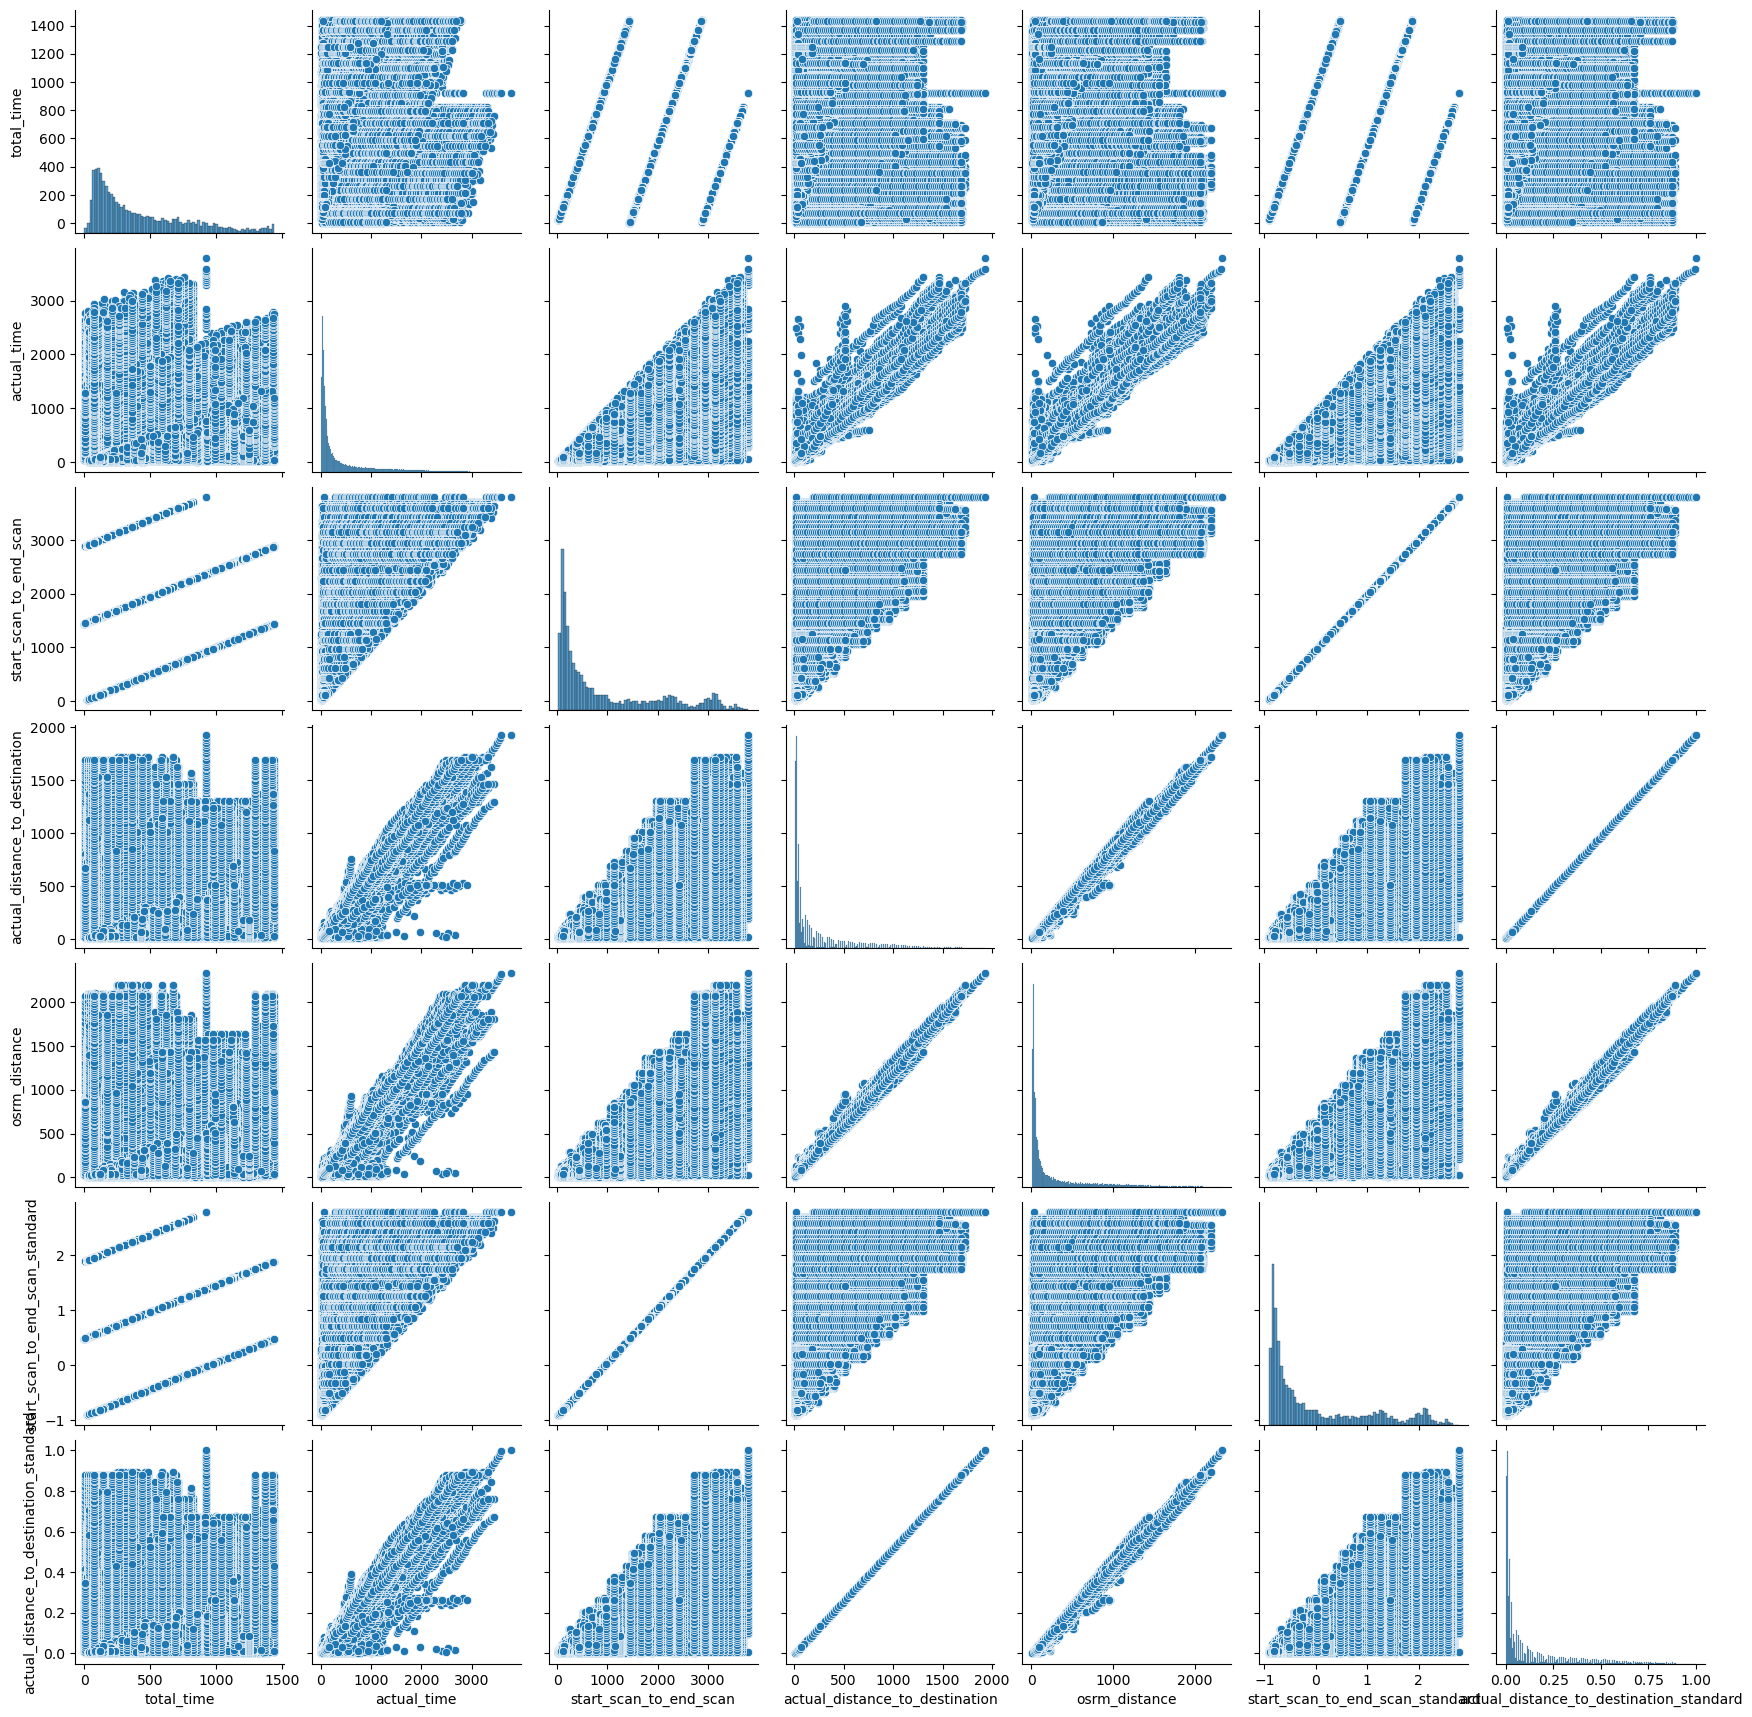

In [166]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df[['total_time','actual_time','start_scan_to_end_scan','actual_distance_to_destination','osrm_distance','start_scan_to_end_scan_standard','actual_distance_to_destination_standard']])


**Insight:** Comparison of different time and distance columns can be seen in the pairplot visualization above

# Checking relationship between aggregated fields

## Compare the difference between total_time and start_scan_to_end_scan Do hypothesis testing/ Visual analysis to check.

In [ ]:
#H0:The means of the distributions underlying the two samples are the same.
#H1:The means of the distributions underlying the two samples are NOT the same.

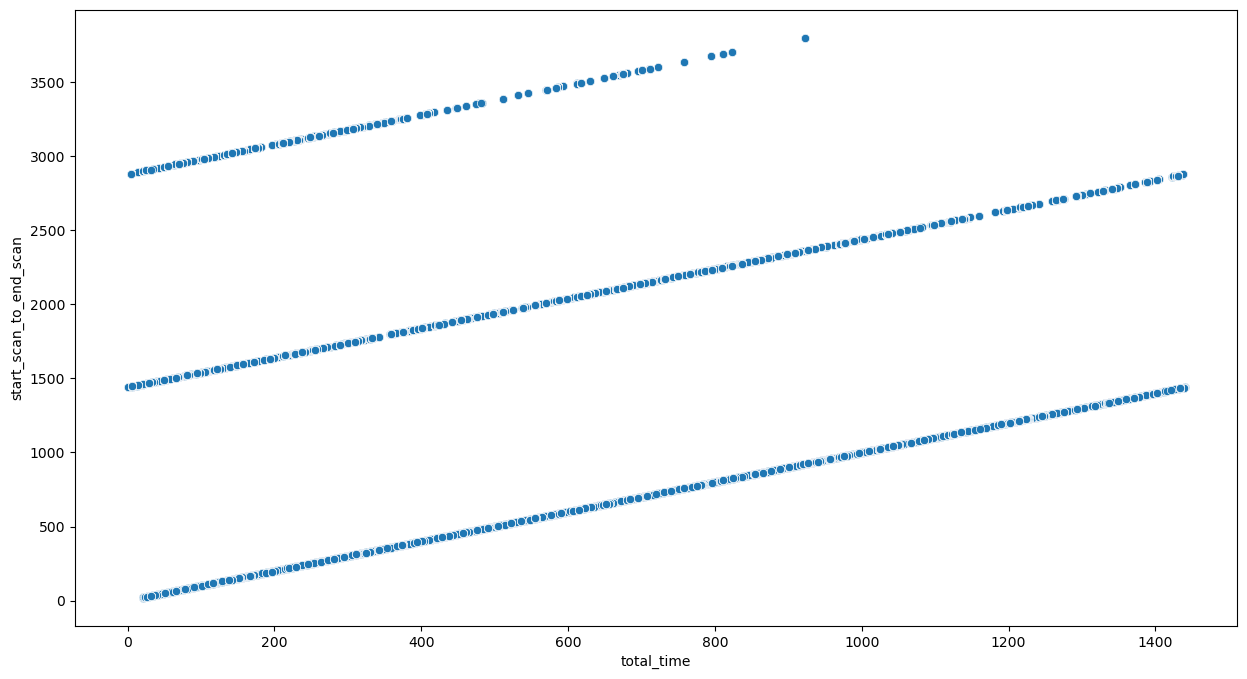

In [192]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='total_time',y='start_scan_to_end_scan',data=df)
plt.show()

In [193]:
stat,pvalue = stats.ttest_ind(df['total_time'], df['start_scan_to_end_scan'])
pvalue

0.0

In [194]:
alpha = 0.05
if pvalue < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


**Insight:** The means of the distributions underlying the two samples are NOT the same

## Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

In [ ]:
#H0:The means of the distributions underlying the two samples are the same.
#H1:The means of the distributions underlying the two samples are NOT the same.

In [197]:
stat,pvalue = stats.ttest_ind(actual_time_aggregated['actual_time'], OSRM_time_aggregated['osrm_time'])
pvalue

1.1384163488225839e-64

In [198]:
alpha = 0.05
if pvalue < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


**Insight:** The means of the distributions underlying the two samples are NOT the same

## Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

In [ ]:
#H0:The means of the distributions underlying the two samples are the same.
#H1:The means of the distributions underlying the two samples are NOT the same.

In [201]:
stat,pvalue = stats.ttest_ind(actual_time_aggregated['actual_time'], segment_actual_time_aggregated['segment_actual_time'])
pvalue

1.6818148011237537e-298

In [202]:
alpha = 0.05
if pvalue < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


**Insight:** The means of the distributions underlying the two samples are NOT the same

## Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [ ]:
#H0:The means of the distributions underlying the two samples are the same.
#H1:The means of the distributions underlying the two samples are NOT the same.

In [205]:
stat,pvalue = stats.ttest_ind(osrm_distance_aggregated['osrm_distance'], segment_osrm_distance_aggregated['segment_osrm_distance'])
pvalue

1.4571870772969992e-277

In [206]:
alpha = 0.05
if pvalue < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


**Insight:** The means of the distributions underlying the two samples are NOT the same

## Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

In [ ]:
#H0:The means of the distributions underlying the two samples are the same.
#H1:The means of the distributions underlying the two samples are NOT the same.

In [210]:
stat,pvalue = stats.ttest_ind(OSRM_time_aggregated['osrm_time'], segment_osrm_time_aggregated['segment_osrm_time'])
pvalue

9.00889079257682e-286

In [211]:
alpha = 0.05
if pvalue < alpha:
    print("Reject H0")
    
    
else : 
    print("cannot reject H0")

Reject H0


**Insight:** The means of the distributions underlying the two samples are NOT the same

# Business Insights

## Check from where most orders are coming from (State, Corridor etc)

In [173]:
temp=df["destination_code_state"].str.split(" ",  expand = True)
temp

0          1     2     3     4
0        D  (Gujarat)  None  None  None
1        D  (Gujarat)  None  None  None
2        D  (Gujarat)  None  None  None
3        D  (Gujarat)  None  None  None
4        D  (Gujarat)  None  None  None
...     ..        ...   ...   ...   ...
144862  HB  (Haryana)  None  None  None
144863  HB  (Haryana)  None  None  None
144864  HB  (Haryana)  None  None  None
144865  HB  (Haryana)  None  None  None
144866  HB  (Haryana)  None  None  None

[144494 rows x 5 columns]

In [174]:
df['destination_state_name']=temp[1]

In [175]:
df.groupby(['destination_state_name']).aggregate({'route_schedule_uuid':'count'}).reset_index().sort_values('route_schedule_uuid')

destination_state_name  route_schedule_uuid
18            (Meghalaya)                    8
26              (Tripura)                    9
19              (Mizoram)                   31
6                  (Dadra                   34
8                   (Goa)                   74
21          (Pondicherry)                  154
12                 (Jammu                  167
1              (Arunachal                  185
5          (Chhattisgarh)                  221
4            (Chandigarh)                  282
20               (Orissa)                  453
11              (Himachal                  543
28          (Uttarakhand)                  666
13            (Jharkhand)                 1076
2                 (Assam)                 1250
15               (Kerala)                 1835
9               (Gujarat)                 2456
3                 (Bihar)                 2809
23            (Rajasthan)                 3335
22               (Punjab)                 3751
16                (Madhya                 3853
27                 (Uttar                 4413
7                 (Delhi)                 5424
0                 (Andhra                 5983
29                  (West                 7051
24                 (Tamil                 7540
25            (Telangana)                 8033
17          (Maharashtra)                15608
14            (Karnataka)                19676
10              (Haryana)                19747

In [176]:
temp=df["source_code_state"].str.split(" ",  expand = True)
temp

0          1     2     3     4
0       DC  (Gujarat)  None  None  None
1       DC  (Gujarat)  None  None  None
2       DC  (Gujarat)  None  None  None
3       DC  (Gujarat)  None  None  None
4       DC  (Gujarat)  None  None  None
...     ..        ...   ...   ...   ...
144862   H  (Haryana)  None  None  None
144863   H  (Haryana)  None  None  None
144864   H  (Haryana)  None  None  None
144865   H  (Haryana)  None  None  None
144866   H  (Haryana)  None  None  None

[144494 rows x 5 columns]

In [177]:
df['source_state_name']=temp[1]

In [178]:
df.groupby(['source_state_name']).aggregate({'route_schedule_uuid':'count'}).reset_index().sort_values('route_schedule_uuid')

source_state_name  route_schedule_uuid
26         (Tripura)                    5
19         (Mizoram)                   26
6             (Dadra                   30
21     (Pondicherry)                   49
18       (Meghalaya)                   77
1         (Arunachal                  151
8              (Goa)                  165
12            (Jammu                  182
5     (Chhattisgarh)                  229
4       (Chandigarh)                  367
20          (Orissa)                  404
11         (Himachal                  532
28     (Uttarakhand)                  827
2            (Assam)                 1126
13       (Jharkhand)                 1343
9          (Gujarat)                 1867
15          (Kerala)                 2038
3            (Bihar)                 2206
22          (Punjab)                 3381
23       (Rajasthan)                 3530
16           (Madhya                 3687
7            (Delhi)                 4318
29             (West                 4645
27            (Uttar                 4791
0            (Andhra                 5087
25       (Telangana)                 6212
24            (Tamil                 6697
14       (Karnataka)                18534
17     (Maharashtra)                18997
10         (Haryana)                26735

In [179]:
df.groupby(['source_city']).aggregate({'route_schedule_uuid':'count'}).reset_index().sort_values('route_schedule_uuid')

source_city  route_schedule_uuid
1200       Tiruchi                    1
655   Kothanalloor                    1
663   Krishnanagar                    1
602     Kayamkulam                    1
1155      Sumerpur                    1
...            ...                  ...
140      Bengaluru                 4237
970           Pune                 4269
172       Bhiwandi                 9088
102      Bangalore                10104
425        Gurgaon                23458

[1272 rows x 2 columns]

In [180]:
df.groupby(['source_place']).aggregate({'route_schedule_uuid':'count'}).reset_index().sort_values('route_schedule_uuid')

source_place  route_schedule_uuid
139      BnkrGate                    1
849      RajpurRD                    1
908      Samyaprm                    1
32       AnadiDPP                    1
914      Sardhnrd                    1
...           ...                  ...
1031     Tathawde                 4061
172       Central                 8988
596       Mankoli                 9088
719      Nelmngla                10053
127      Bilaspur                23257

[1178 rows x 2 columns]

In [181]:
df.groupby(['destination_city']).aggregate({'route_schedule_uuid':'count'}).reset_index().sort_values('route_schedule_uuid')

destination_city  route_schedule_uuid
623          Khatauli                    1
281             Daman                    1
433         Hanskhali                    1
353             Falna                    1
1052            Salem                    1
...               ...                  ...
296             Delhi                 5362
170          Bhiwandi                 5511
462         Hyderabad                 5838
105         Bangalore                11010
418           Gurgaon                15393

[1271 rows x 2 columns]

In [182]:
df.groupby(['destination_place']).aggregate({'route_schedule_uuid':'count'}).reset_index().sort_values('route_schedule_uuid')

destination_place  route_schedule_uuid
426              Kadtmpty                    1
921              ShivaDPP                    1
436  Kalyan (Maharashtra)                    1
37               ArickDPP                    1
900              SbhRDDPP                    1
..                    ...                  ...
912              Shamshbd                 5309
581               Mankoli                 5511
164               Central                 9373
698              Nelmngla                10942
123              Bilaspur                15363

[1154 rows x 2 columns]

**Insight:** places like Gurgaon and Bilaspur in  Haryana seems to be the place from where most orders are placed as seen above

## Busiest corridor, avg distance between them, avg time taken

In [184]:
df.groupby(['source_city','destination_city']).aggregate({'route_schedule_uuid':'count','actual_distance_to_destination':'mean', 'total_time':'mean'}).reset_index().sort_values('route_schedule_uuid')

source_city                 destination_city  route_schedule_uuid  \
2377        Vizag   Vishakhapatnam (Andhra Pradesh)                    1   
1335      Kottayam                     Kothanalloor                    1   
1432    Mahasamund                             Durg                    1   
596          Delhi              North Delhi (Delhi)                    1   
1332  Kothanalloor                           Vaikom                    1   
...            ...                              ...                  ...   
193      Bangalore                        Bengaluru                 1741   
274      Bengaluru                        Bengaluru                 2062   
844        Gurgaon                          Kolkata                 2802   
201      Bangalore                          Gurgaon                 3316   
819        Gurgaon                        Bangalore                 4899   

      actual_distance_to_destination  total_time  
2377                        9.228686  231.200000  
1335                       15.211748  399.620000  
1432                       77.035515  902.830000  
596                         9.045083  726.820000  
1332                       15.603861   57.380000  
...                              ...         ...  
193                        21.535381  220.859081  
274                        22.267936  162.984753  
844                       672.777483  854.210525  
201                       869.072245  375.352325  
819                       859.844671  310.120988  

[2397 rows x 5 columns]

**Insight:** Bangalore - Gurgaon - Bangalore seems to be the bussiest corridor of all

# Actionable items for business

- business should focus on routes other than just well developed routes like Gurgaon and bangalore
- They should use a different approach to calculate osrm time since the accuracy is not that high
- data capture for full source and destination name should be improved so that there are no missing values in data